# Regression

## Lineare Regression
Die Regressionsanalyse ist eines der wichtigsten Gebiete der Statistik und des maschinellen Lernens. Dabei stehen viele Regressionsmethoden zur Verfügung, unter anderem die lineare Regression. Sie stellt einen linearen Zusammenhang zwischen zwei oder mehreren variablen her. 

Sie können zum Beispiel die Anzahl Bestellungen in einem Unternehemn betrachten und untersuchen wie die Anzahl Bestellungen von der Jahreszeit, den Konkurenzangeboten oder der Anzahl geschalteter Werbeanzeigen abhängt. Dabei gehen wir davon aus, dass Jahreszeit, Konkurenzangebote und Anzahl geschalteter Werbeangebote die unabhängigen Merkmale sind, während die Anzahl Bestellungen von ihnen abhängt.

Zur Veranschauichung der linearen Regression in Python laden wir Daten zum Thema Bierkonsum in Sao Paolo. Der Datensatz enthält Informationen über das Datum, die Temperatur, die Niederschlagsmenge, den Wochentag und wie viel Bier konsumiert wurde. Lässt sich hier ein linearer Zusammenhang finden?

### Einfache lineare Regression

In [1]:
#Notwendige Pakete laden
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
beer = pd.read_csv(r"C:\Users\dormuth\Desktop\MSIND\02_Lehre\2021WiSe_Statistics_meets_Logistics\02_Übung\1117_Regression\beers.csv", index_col=0)
# Fügen Sie hier den Dateipfad ein, unter dem sie den Datensatz gespeichert haben
# Das r vor dem Pfad ermöglicht es die Backslashes beizubehalten und nicht jeden einzelnen umwandeln zu müssen

print(beer.head()) # Nur die ersten 5 Zeilen ausgeben

beer.dtypes

         Date  Median_Temp  Min_Temp  Max_Temp  Rain_mm  Weekend  \
0  2015-01-01        27.30      23.9      32.5      0.0      0.0   
1  2015-01-02        27.02      24.5      33.5      0.0      0.0   
2  2015-01-03        24.82      22.4      29.9      0.0      1.0   
3  2015-01-04        23.98      21.5      28.6      1.2      1.0   
4  2015-01-05        23.82      21.0      28.3      0.0      0.0   

   Beer_consumption  
0            25.461  
1            28.972  
2            30.814  
3            29.799  
4            28.900  


Date                 object
Median_Temp         float64
Min_Temp            float64
Max_Temp            float64
Rain_mm             float64
Weekend             float64
Beer_consumption    float64
dtype: object

Viele Ansätze aus der Statistik und dem Maschinellen Lernen funktionieren indem sie aus Eingabedaten ein mathematisches Modell aufbauen. Damit man überprüfen kann, ob die Methode nicht nur auf den Daten funktioniert sondern allgemeingültig ist, teilt man den Datensatz in mehrere Datensätze auf. Insbesondere drei Datensätze werden üblicherweise in verschiedenen Phasen der Modellerstellung verwendet:

- **Trainingsdatensatz:** Anpassung der Parameter des Modells. Die Modellanpassung kann sowohl die Variablenauswahl als auch die Parameterschätzung umfassen.

- **Validierungsdatensatz:** (notwendig abhängig von der Methode): Bewertung eines Modellfit auf dem Trainingsdatensatz, während die Hyperparameter (Parameter, die vor dem eigentlichen Training festgelegt werden müssen) des Modells abgestimmt werden. 

- **Testdatensatz:** unvoreingenommene Bewertung einer endgültigen Modellanpassung  

In [3]:
# Geben Sie die Anzahl Zeilen und Spalten aus
beer.shape

(365, 7)

In [4]:
# Verwenden sie values.reshape um nur die Werte ohne Index zu bekommen
x = beer["Median_Temp"].values.reshape(-1,1)
y = beer["Beer_consumption"].values.reshape(-1,1)

In [5]:
# Importieren Sie aus sklearn die Funktion train_test_split für Trainings- und Testdaten
from sklearn.model_selection import train_test_split

# Teile die Daten so auf, dass zufaellig 20% der Daten fuer die Testdaten zrueck gelegt werden
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=12) 

In [6]:
# Für lineare Regression benötigen wir die Funktion LinearRegression
from sklearn.linear_model import LinearRegression

In [7]:
# Erstellen Sie ein Objekt der Klasse LinearRegression
model = LinearRegression()

In [8]:
# Passen Sie das Modell auf den Trainingsdaten an
model.fit(x_train, y_train)
# Sagen Sie die Daten auf Basis der Testdaten mit diesem Modell vorher
Y_pred = model.predict(x_test)

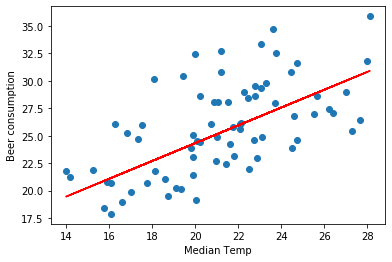

In [9]:
# Visualisieren Sie die wahren Daten und die Gerade der vorhergesagten Daten
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_pred, color='red')
plt.xlabel('Median Temp')
plt.ylabel('Beer consumption')
plt.show()

In [10]:
# Bestimmtheitsmaß (nicht adjustiert)
r_sq = model.score(x_test, y_test)
print("R2:", r_sq)

R2: 0.3436980337845942


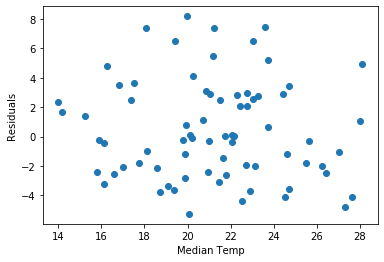

In [11]:
# Residualplot
plt.scatter(x_test, y_test-Y_pred)
plt.xlabel('Median Temp')
plt.ylabel('Residuals')
plt.show()

In [12]:
print(model.coef_)
print(model.intercept_)

[[0.81154125]]
[8.08455151]


Das geht besser. Vielleicht reicht eine Variable hier nicht um den Bierkonsum zu erklären. Außerdem zeigt der Residualplot hier einen leicht legativen Trend mit größer werdenden x-Werten, vielleicht könnte eine Transformation der Daten sinnvoll sein.

Allgemein gibt es verschiedene Methoden zur Validierung, denn hier hängt die Kennzahl R2 von der Aufteilung der Daten ab, deshalb gibt es Methoden wie Kreuzvalidierung, die mehrmals verschiedene Aufteilungen in Test- und Trainingsdaten erzeugen.

---------
## Aufgabe
Wie interpretieren Sie die Werte des Koeffizienten und des Intercepts? Welchen Parametern entsprechen sie in der Formel der linearen Regression? Bestimmen Sie die Vorhersage für den Bierkonsum an einem Tag mit einer Medianen Temperatur von 24°C. 

Berechnen Sie den MSE für unser Modell auf Basis der Testdaten.

In [13]:
# Hier kann Ihre Lösung stehen

----------
### Multiple lineare Regression
Die multiple lineare Regression ermöglicht es eine abhängige Variable durch mehrere unabhängige Variablen zu erklären. Dabei wird angenommen, dass der Zusammenhang linear ist. Um eine schnelle Linearitätsprüfung durchzuführen, können Streudiagramme verwendet werden(siehe Matliplotlib-Bibliothek)

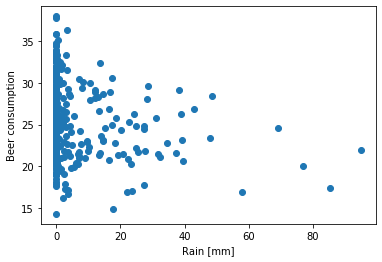

In [14]:
# Paarweise Scatterplots, zur Evaluation des linearen Zusammenhangs
plt.scatter(beer['Rain_mm'], beer['Beer_consumption'])
plt.xlabel('Rain [mm]')
plt.ylabel('Beer consumption')
plt.show()

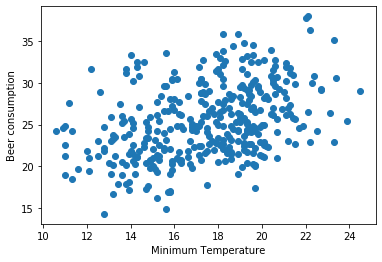

In [15]:
plt.scatter(beer['Min_Temp'],beer['Beer_consumption'])
plt.xlabel('Minimum Temperature')
plt.ylabel('Beer consumption')
plt.show()

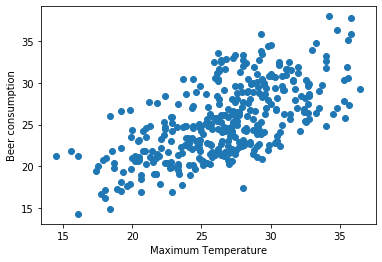

In [16]:
plt.scatter(beer['Max_Temp'], beer['Beer_consumption'])
plt.xlabel('Maximum Temperature')
plt.ylabel('Beer consumption')
plt.show()

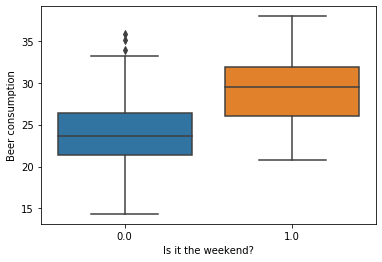

In [17]:
# Da wir hier eine binäre Variable haben sind Scatterplots nicht unbedingt sinnvoll
# Trotzdem ist es interessant, ob die Variable einen Einfluss hat oder nicht
import seaborn as sns

sns.boxplot(x='Weekend',y='Beer_consumption',data=beer)
plt.xlabel('Is it the weekend?')
plt.ylabel('Beer consumption')
plt.show()

Insgesamt scheint die Variable *Rain_mm* keinen linearen Zusammenhang mit unserer Zielvariable zu haben, weshalb wir sie im folgenden nicht weiter berücksichtigen werden. Die Variablen *Max_temp* und *Min_Temp* weisen einen linearen Zusammenhang auf. Auch die binäre Variable *Weekend* scheint relevant zu sein, da anhand des Boxplots zu erkennen ist, dass der Bierkonsum scheinbar an Wochenenden höher ist als in der Woche.

In [18]:
X = beer[['Max_Temp', "Weekend"]] # Hier beinhaltet X zwei Variablen
Y = beer['Beer_consumption']

In [19]:
# Teile die Daten so auf, dass zufaellig 20% der Daten fuer die Testdaten zrueck gelegt werden
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=23) 

In [20]:
# with sklearn
regr = LinearRegression()
regr.fit(X_train, Y_train)

Y_pred = regr.predict(X_test)

In [21]:
r_sq = regr.score(X_test, Y_test)
print("R2:", r_sq)

R2: 0.677435533232714


In [22]:
# Regressionskoeffizienten
print(regr.coef_)
print(regr.intercept_)


[0.67652501 5.29993436]
5.881482348600574


Eine alternative Funktion für die lineare Regression in python ist *sm.OLS* aus der Bibliothek *statsmodels*. Sie bietet die Möglichkeit zusätzliche Informationen bezüglich des Modells zu erhalten, wie p-Werte oder Gütemaße.

In [23]:
import statsmodels.api as sm

In [24]:
# Intercept hinzufügen ist für dieses Modell notwendig
X_train_int = sm.add_constant(X_train) 

# Bestimmen Sie das Modell
est = sm.OLS(Y_train, X_train_int)

# Passen Sie das Modell an
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Beer_consumption   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     338.5
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           1.85e-76
Time:                        09:33:41   Log-Likelihood:                -670.44
No. Observations:                 292   AIC:                             1347.
Df Residuals:                     289   BIC:                             1358.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8815      0.899      6.541      0.0

---------------------
## Aufgabe
Warum haben wir hier nur *Max_Temp* aber nicht *Min_Temp* berücksichtigt?
Versucht nun das Modell selbst anzupassen und eine Vorhersage der Bierkonsumation für einen Samstag mit einer Höchsttemperatur von 32 Grad, einen Mittwoch mit einer Höchsttemperatur von 33 Grad und einen Sonntag mit einer Höchsttemperatur von 24 Grad zu machen.

In [25]:
# Hier kann Ihre Lösung stehen

-----------------
## Logistische Regression
Die logistische Regression ist eine statistische Methode zur Vorhersage von binären Klassen. Die Zielvariable in einem binären logistischen Modell ist eine Variable mit zwei möglichen Werten, wie z.B. bestanden/nicht bestanden. Dies wird durch Indikatorvariablen dargestellt, wobei die beiden Werte mit "0" und "1" bezeichnet werden. Der Output des Modells ist die Wahrscheinlichkeit, dass mit den gegebenen Inputvariablen das Objekt der Kategorie 1 zugehört.

In [26]:
titanic_train = pd.read_csv(r"C:\Users\dormuth\Desktop\MSIND\02_Lehre\2021WiSe_Statistics_meets_Logistics\02_Übung\1117_Regression\Titanic_train.csv", index_col=0)
titanic_test = pd.read_csv(r"C:\Users\dormuth\Desktop\MSIND\02_Lehre\2021WiSe_Statistics_meets_Logistics\02_Übung\1117_Regression\Titanic_test.csv", index_col=0)

In [27]:
# Nur die ersten Zeilen anzeigen
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# Wieviele Zeilen und Spalten
titanic_train.shape

(891, 11)

In [29]:
# Fehlende Werte in Trainingsdaten
titanic_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Es gibt fehlende Werte für insgesamt 3 Variablen. Der Anteil fehlender Werte für die Variable *Cabin* ist sehr hoch, deshalb berücksichtigen wir diese Variable im Folgenden nicht weiter. Für die Variablen *Age* und *Embarked* wären verschiedene Imputationsansätze möglich, dies geht hier jedoch zu weit, deshalb werden wir einfach Perosnen mit fehlenden Werten nicht weiter in der Analyse berücksichten.

In [30]:
# Entferne alle fehlenden Werte
titanic_train.drop("Cabin", axis = 1, inplace = True) # inplace = True die Operation wird im df gespeichert
titanic_train = titanic_train.dropna(axis = 0)
titanic_train.shape

(712, 10)

In [31]:
titanic_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [32]:
# Erzeuge kategorielle Variablen 
#create categorical variables and drop some variables
training=pd.get_dummies(titanic_train, columns=["Pclass","Embarked","Sex"])
print(training.head())

             Survived                                               Name  \
PassengerId                                                                
1                   0                            Braund, Mr. Owen Harris   
2                   1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3                   1                             Heikkinen, Miss. Laina   
4                   1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5                   0                           Allen, Mr. William Henry   

              Age  SibSp  Parch            Ticket     Fare  Pclass_1  \
PassengerId                                                            
1            22.0      1      0         A/5 21171   7.2500         0   
2            38.0      1      0          PC 17599  71.2833         1   
3            26.0      0      0  STON/O2. 3101282   7.9250         0   
4            35.0      1      0            113803  53.1000         1   
5            35.0      0      0    

In [33]:
training.drop('Sex_female', axis=1, inplace=True) # bei binären Variablen reicht eine Spalte
training.drop('Name', axis=1, inplace=True) # ungeeignet für das Modell
training.drop('Ticket', axis=1, inplace=True) # ungeeignet für das Modell

In [34]:
# Gleiche Anpassungen für die Testdaten
titanic_test.drop('Cabin', axis=1, inplace=True)
titanic_test = titanic_test.dropna(axis = 0)
titanic_test.shape

(331, 9)

In [35]:
# Erzeuge kategorielle Variablen und entferne ungeeignete Variablem
testing=pd.get_dummies(titanic_train, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

In [59]:
# Importiere nötige Funktion 
from sklearn.linear_model import LogisticRegression

# Variablen, die wir im Modell berücksichtigen
cols = ["Age","Fare","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"] 

# Definiere test und trainings X und Y
X_train = training[cols]
y_train = training['Survived']

X_test = testing[cols]
y_test = testing['Survived']

# Modellanpassung für 4000 Iterationen
logreg = LogisticRegression(max_iter=4000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

# Berechne den Accuracy Score: wie oft stimmen die vorhergesagten Labels mit den 
# entsprechenden labels in y_test überein
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))

So, Our accuracy Score is: 0.7935


Für eine ausführlichere Logistische Regression dieser Daten besucht https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python.

----------
## Aufgabe
Wir haben zuvor gesehen, dass es eine Alternative Funktion für die Lineare Regression gibt. Genauso gibt es eine Alternative für die logistische Regression. In *statsmodels* ist die Funktion *Logit* enthalten (genauere Informationen finden sie Z.B. unter https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html). Laden sie die Funktion und führen sie die logistische Regression mit dieser Funktion durch. Vergleichen Sie die Ergebnisse.

In [38]:
# Hier kann Ihre Lösung stehen

-------------
## Lasso Regression
Das Lasso (Operator für die geringste absolute Schrumpfung und Auswahl; auch Lasso oder LASSO) ist eine Regressionsanalysemethode, die sowohl die Variablenauswahl als auch eine Regularisierung durchführt, um die Vorhersagegenauigkeit und Interpretierbarkeit des von ihr erzeugten statistischen Modells zu verbessern. 

In [39]:
# Datensatz zur Standardisierte Fruchtbarkeitsmessung 
# mit Indikatoren für jede der 47 französischsprachigen Provinzen der Schweiz um 1888. 
swiss = pd.read_csv(r"C:\Users\dormuth\Desktop\MSIND\02_Lehre\2021WiSe_Statistics_meets_Logistics\02_Übung\1117_Regression\swiss.txt", index_col=0)

In [40]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Location,,,,,,
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


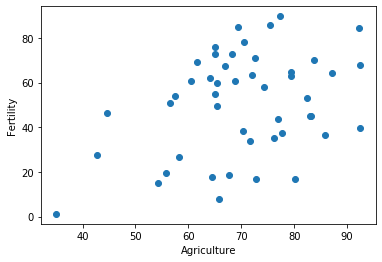

In [41]:
# Visualisierung der Zusammenhänge der einzelnen Variablen mit Fertility
plt.scatter(swiss.Fertility, swiss.Agriculture)
plt.ylabel('Fertility')
plt.xlabel('Agriculture')
plt.show()

plt.scatter(swiss.Fertility, swiss.Examination)
plt.ylabel('Fertility')
plt.xlabel('Examination')
plt.show()

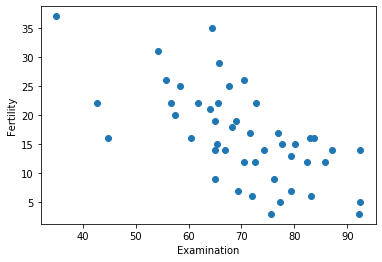

In [42]:
plt.scatter(swiss.Fertility, swiss.Examination)
plt.ylabel('Fertility')
plt.xlabel('Examination')
plt.show()

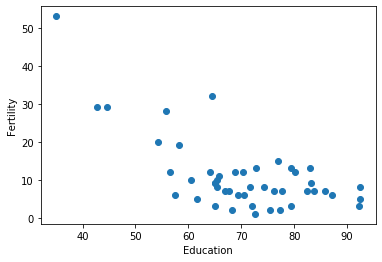

In [43]:
plt.scatter(swiss.Fertility, swiss.Education)
plt.ylabel('Fertility')
plt.xlabel('Education')
plt.show()

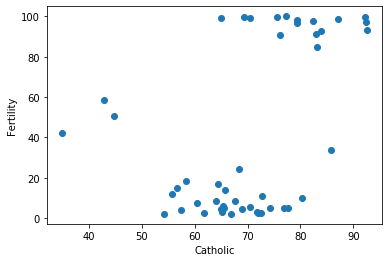

In [44]:
plt.scatter(swiss.Fertility, swiss.Catholic)
plt.ylabel('Fertility')
plt.xlabel('Catholic')
plt.show()

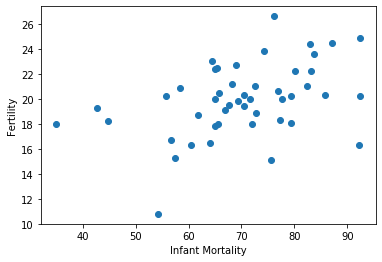

In [45]:
plt.scatter(swiss.Fertility, swiss["Infant.Mortality"])
plt.ylabel('Fertility')
plt.xlabel('Infant Mortality')
plt.show()

In [46]:
# Definiere Matrix mit erklärenden Variablen und vektor mit Zielvariable
x = swiss.drop(["Fertility"], axis = 1)
y = swiss["Fertility"]

# Teile die Daten so auf, dass zufaellig 20% der Daten fuer die Testdaten zrueck gelegt werden
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=34) 

In [47]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [48]:
# Lasso Regression mit festem Parameter alpha
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)

lasso.coef_

array([-0.17223027, -0.22369493, -0.84058163,  0.07493914,  0.90341185])

In [49]:
# Quantifizierung 
mean_squared_error(y_test, lasso.predict(x_test))

80.7476359199924

Um den optimalen Wert für den Parameter alpha zu bestimmen führen wir eine Lasso Regression mit verschiedenen Werten für alpha durch. Hier sind wir also im Falle des Hyperparametertunings und brauchen einen Validierungsdatensatz. Dafür teilen wir unseren Trainingsdatensatz nochmal auf.

In [50]:
# Teile die Daten so auf, dass zufaellig 20% der Daten fuer die Validierungsdaten zrueck gelegt werden
x_train_small,x_val,y_train_small,y_val=train_test_split(x_train,y_train,test_size=0.2, random_state=46) 

In [51]:
# Tupel mit möglichen lamdas (wir wollen hier nichts ändern)
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = x.shape[1]

# Daten für enumerate vorbereiten
# enumerate erlaubt es uns, eine Schleife über etwas zu legen und einen automatischen Zähler zu haben
coeff_a = np.zeros((l_num, pred_num)) #neues Array mit gegebener Form und gegebenem Typ zurück, das mit Nullen gefüllt ist
train_r_squared = np.zeros(l_num)
val_r_squared = np.zeros(l_num)

In [52]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i) # Erstelle ein model mit dem i-ten Eintrag aus lambda
    reg.fit(x_train_small, y_train_small) # Passe das Modell an

    coeff_a[ind,:] = reg.coef_ # Weise dem array an der Zählstelle die zugehörigen Regressionskoeffizienten zu
    print(reg.coef_)
    train_r_squared[ind] = reg.score(x_train_small, y_train_small) # Speichere das Bestimmtheitsmaß für die Trainingsdaten
    val_r_squared[ind] = reg.score(x_val, y_val) #und für die Validierungsdaten

[-0.19805494 -0.38937227 -0.74180886  0.04309077  0.8425177 ]
[-0.19803564 -0.38934367 -0.74177763  0.04309416  0.8414568 ]
[-0.19755018 -0.38794329 -0.74154482  0.0432129   0.83160721]
[-0.19539258 -0.38171938 -0.74051008  0.04374062  0.78783129]
[-0.19269615 -0.37394168 -0.73921649  0.04440009  0.7331099 ]
[-0.18730272 -0.3583841  -0.73662948  0.04571922  0.6236686 ]
[-0.13202903 -0.1816094  -0.71310168  0.05940912  0.        ]


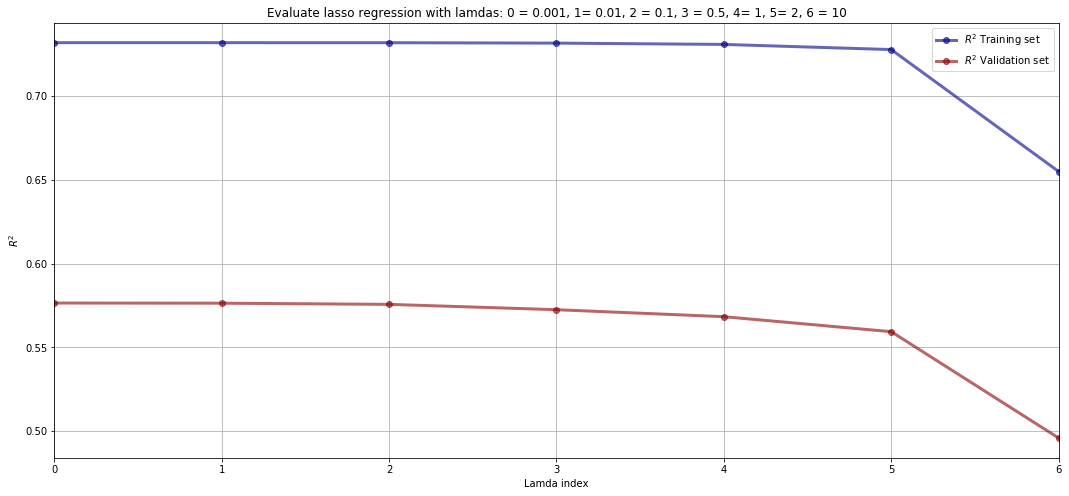

In [53]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(val_r_squared, 'bo-', label=r'$R^2$ Validation set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [54]:
df_lam = pd.DataFrame(val_r_squared, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    0.576434
lambda       0.001000
Name: 0, dtype: float64

In [55]:
# Lasso Regression mit festem Parameter alpha
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)

print(lasso.coef_)
# Quantifizierung 
mean_squared_error(y_test, lasso.predict(x_test))

[-0.17909257 -0.24730071 -0.84336934  0.07291064  1.01956336]


79.20365889068293

Insgesamt zeigt sich im Hinblick auf dieses Beispiel nur eine geringe Verbesserung was aufgrund der Abbildungen bereits zu erwarten war. In anderen Anwendungsfällen kann dies zu einer deutlichen Reduktion des Fehlers führen. Bei der Optimierung hinsichtlich der Hyperparameter ist es sinnvoll im Bezug auf ein anderes Qualitätsmaß zu optimieren, als das Maß was man zur Beurteilung des Modells verwendet, um Überanpassung zu vermeiden. Im Falle von kleinen Datensätzen bietet sich sonst auch noch eine Kreuvalidierung an.

---------
## Aufgabe
EIne bekannte Alternative zur Lasso Regression ist die Ridge Regression. Im Gegensatz zur Lasso Regression ist der Penalsierungsterm bei der Ridge Regression das Quadrat der Koeffizienten. Das führt dazu, dass Ridge Regression keine Variablenselektion durchführt sondern lediglich die Parameter regularisiert.

In [56]:
# Hier kann Ihre Lösung stehen